<a href="https://colab.research.google.com/github/amuedano/integrated-science/blob/main/Andr%C3%A9s_Muedano%2C_LS50B_PSET_5_Problem_1_(Digits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import defaultdict
import PIL
import pandas as pd
import seaborn as sns
from scipy.signal import convolve2d

Please upload the files `LS50_2024_digits.zip` from canvas onto this colab before running the following cells.

In [ ]:
!unzip -o LS50_2024_digits.zip > /dev/null

In [ ]:
names = open('LS50_2024_digits/names.txt').read().strip().split('\n')
digits = '0123456789X'
images = dict()
for n, name in enumerate(names):
    images[name] = list()
    for i in range(11):
        digit = digits[i]
        image = PIL.Image.open(f'LS50_2024_digits/student{n}_digit{i}.png')
        images[name].append(np.asarray(image))

The variable `names` is the list of everyone's names. Here is a demonstration:

In [ ]:
print(names)

['Mei F', 'Marvel H', 'Joy X', 'Andrés M', 'David A', 'Elane L', 'Allison W', 'Tim G', 'Sarah Rose O', 'Camryn N', 'Nicholas D', 'Isabel L', 'Tina C', 'Chris S', 'Ambika O', 'Himani Y', 'Kaitlin C', 'Ozioma O', 'Connor C', 'Emerson U', 'Justice S', 'Justin R', 'Satrik D', 'James H', 'Amov K', 'Jiajia Z', 'Fhasal A', 'Maks F', 'Stephanie N', 'Kate K', 'Theo T', 'SangHoon J', 'Aneesh M', 'Isaac B', 'Luis A', 'Emma N', 'Ryan M', 'Ben d']


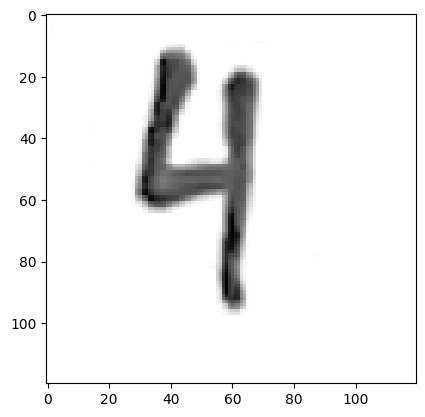

In [ ]:
plt.imshow(images['Ben d'][4], cmap='Greys_r')

In [ ]:
# Here's a helper function to plot a bunch of images, feel free to use it!
def plot_digits(images, titles=digits, label=''):
    '''
    Makes a plot of a row of images with matplotlib. The images are all shown
    on the same color scale, and a color bar is plotted to the right.

    Parameters:
        images: a list of numpy arrays, each representing an image
        titles: a list of titles to put on top of each image. The length
                of this list should be the same as the same as `images`.
        label: a string, label to display on the left of the row of images
    '''
    fig, axes = plt.subplots(1, len(images), figsize=(len(images)*1.2, 1))

    # Set the shared color scale for all images
    vmin = np.concatenate(images).min()
    vmax = np.concatenate(images).max()
    if vmin < 0:
        cmap = 'seismic'
    else:
        cmap = 'Greys_r'

    # Plot each image
    for i in range(len(images)):
        ax = axes[i]
        im = ax.imshow(images[i], cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_title(titles[i], fontsize='larger')
        ax.set_xticks([])
        ax.set_yticks([])

    # Add colorbar
    fig.subplots_adjust(left=0.1, right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.0, 0.01, 1])
    fig.colorbar(im, cax=cbar_ax)

    # Add title
    title_ax = fig.add_axes([0.0, 0.0, 0.1, 1])
    title_ax.axis('off')
    title_ax.text(x=0.9, y=0.5, transform=title_ax.transAxes,
                  s=label, ha='right', va='center', fontsize='larger')
    plt.show()

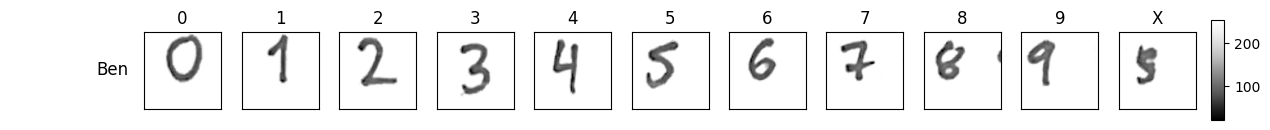

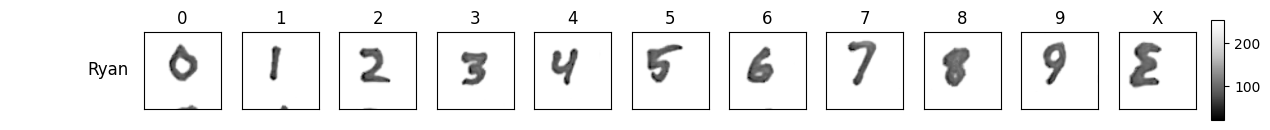

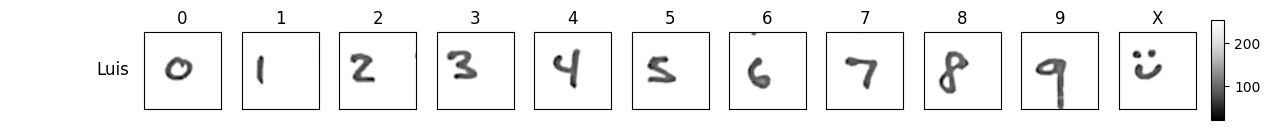

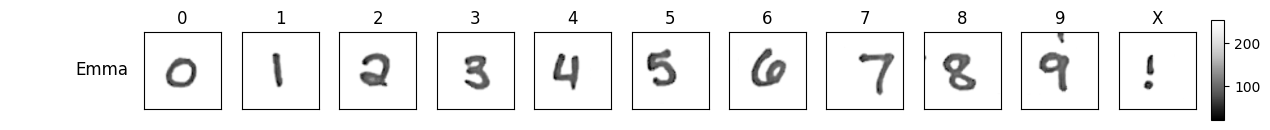

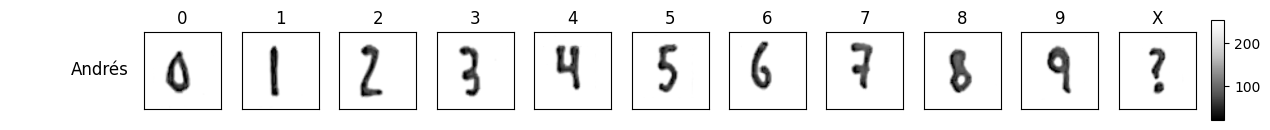

In [ ]:
plot_digits(images['Ben d'], label='Ben')
plot_digits(images['Ryan M'], label='Ryan')
plot_digits(images['Luis A'], label='Luis')
plot_digits(images['Emma N'], label='Emma')
plot_digits(images['Andrés M'], label ='Andrés')

## part (a) -- basic dataset info

In [ ]:
### ANSWER ###

# 1. image reoslution
resolution = None
for name, image_list in images.items():
    for image_arr in image_list:
        height, width = image_arr.shape[:2]
        if resolution is None:
            resolution = (height, width)
        elif (height, width) != resolution:
            raise ValueError("images have different resolutions")
print("resolution of each image:", resolution)

# 2. number of classes ("classification based on distinct image type")
num_classes = len(image_list)
print("number of classes (names):", num_classes)

# 3. number of classes ("classification based on writer")
num_classes = len(images)
print("Number of classes (names):", num_classes)

# 4. total number of images
total_images = sum(len(image_list) for image_list in images.values())
print("total number of images:", total_images)

resolution of each image: (120, 120)
number of classes (names): 11
Number of classes (names): 38
total number of images: 418


### Answer:
The resolution of each image is 120 x 120 pixels.
There are 11 distinct image classes (i.e. each person drew 11 different images) and 38 different writers (i.e. 38 different people drew the same 11 different images).
As such, there are 418 images in total (38 x 11).

### part (b) -- identifying sensitivity of a kernel

```
### ANSWER ###

The given 3 x 3 convolution kernel is a Laplacian kernel. Such a kernel is optimal at detecting high-contrast edges in images.
(that is, edges characterized by rapid and significant changes in intensity beteen adjacent pixels. With a central value of 8
surrounded by -1s, this kernel emphasizes (gives greater weight) to areas where there is a large difference in intensity between
neighboring pixels. As such, this kernel can be used to identify boundaries between objects with distinct colors or shades.
```

### part (c) -- horizontal kernel

In [ ]:
### ANSWER ###

horz_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print(horz_kernel)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


```
### EXPLANATION ###

kernel assings higher weights to pixels on top row and lower weights to pixels on bototm row. as such, it highlights areas where
there is a significant change in intensity between neighboring pixels along the horizonal direction. this faciliates horizontal
edge detection.
```



## part (d) -- digit sensitivity to horizontal edginess

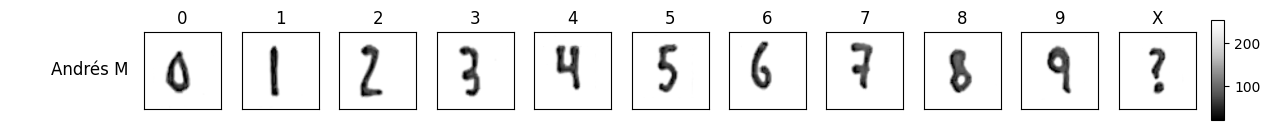

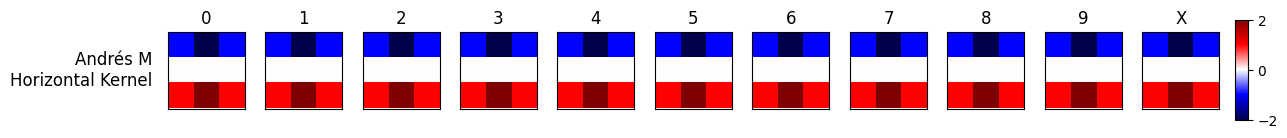

In [ ]:
### ANSWER ###

# horizontal edge detection kernel repeated 11 times (one per image type)
conv_horz = [[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]] * 11

# name of the image set to be plotted
name = 'Andrés M'

# plot images written by indicated person
plot_digits(images[name], label=name)

# plot horizontal edge detection kernel with label
plot_digits(conv_horz, label=name + '\nHorizontal Kernel')

```
### EXPLANATION ###

horizontal edge detection is particularly effective for digits that have distinctive horizontal features. most
benefit: digits with horizontal strokes, like 2, 4, 5, and 7. least benefit: digits with predominantly vertical
or diagonal strokes, like 1, 3, 6 and 9, in addition to symmetrical digits (like 0 and 8) and irregular shapes
(like the character "?") that lack distinct horizontal features.

```

## part (e) -- horizontal edge detector acting on my digits

Apply this horizontal edge detector to all of the digits you wrote. (If you wrote multiple sets of
digits, pick your favorite set.) Hint: use scipy.signal.convolve2d. Visualize the results. Do they
agree with your expectation?

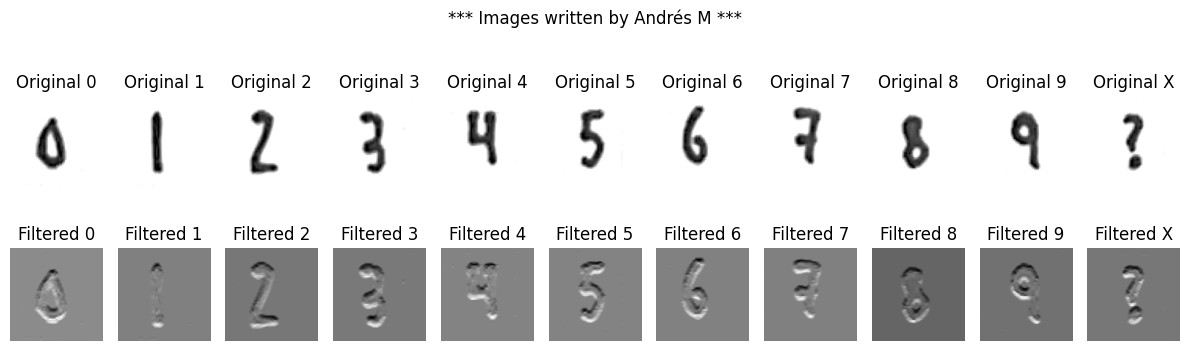

In [ ]:
### ANSWER ###

# apply edge detector to images made by myself
filtered_images = []
for image in images['Andrés M']:
    # apply convolution
    filtered_image = convolve2d(image, horz_kernel, mode='same', boundary='symm')
    filtered_images.append(filtered_image)

# plot original and filtered images
plt.figure(figsize=(12, 4))
plt.suptitle('*** Images written by Andrés M ***')
for i, (image, filtered_image) in enumerate(zip(images['Andrés M'], filtered_images)):
    plt.subplot(2, len(images['Andrés M']), i + 1)
    plt.imshow(image, cmap='gray')
    if i == 10:
      plt.title('Original X')
    else:
      plt.title(f'Original {i}')
    plt.axis('off')

    plt.subplot(2, len(images['Andrés M']), len(images['Andrés M']) + i + 1)
    plt.imshow(filtered_image, cmap='gray')
    if i == 10:
      plt.title('Filtered X')
    else:
      plt.title(f'Filtered {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

```
### ANSWER ###

As expected, digits with distinctive horizontal features (such as 2, 4, 5, and 7) can be easily detected. However,
it is surprising that the detector picked up on horizontal features of more curvilinear digits (such as 3, 6 and 9).
```



## part (f) -- horizontal edginess feature

[437, 355, 352, 310, 483, 290, 389, 314, 341, 349, 277]


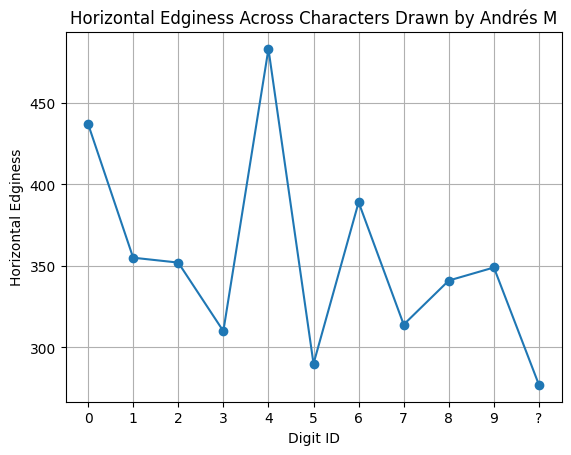

In [ ]:
horz_cutoff = 200 # FIXME

# horizontal edginess calculation
horzedg = []
for character in filtered_images:
  pixcount = 0
  for row in character:
    for pixval in row:
      if pixval >= horz_cutoff:
        pixcount += 1
  horzedg.append(pixcount)
print(horzedg)

# plot the relationship between the two variables
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "?"]
plt.plot(digits, horzedg, marker='o', linestyle='-')
plt.xlabel('Digit ID')
plt.ylabel('Horizontal Edginess')
plt.title('Horizontal Edginess Across Characters Drawn by Andrés M')
plt.grid(True)
plt.show()

```
### ANSWER ###

As shown by the graph produced, different digits exhibit different horizontal edginess. If this distribution is conserved
across the sets of digits written by all 38 individuals, then horizontal edginess might serve as a useful feature to
tell the digits apart from each other (in order to classify them and assign them labels).
```



## part (g) -- plot horizontal edginess for everyone

Feel free to use the pandas dataframe in our code template to help you keep track of this information. It is similar to an excel spreadsheet.

In [ ]:
horz_counts = pd.DataFrame(index=names, columns=list(digits)).rename_axis(index='name', columns='digit')
for name in names:
    for i, digit in enumerate(digits):
        count = 0 # FIXME
        horz_counts.loc[name, digit] = count
horz_counts.head()

digit,0,1,2,3,4,5,6,7,8,9,?
name,,,,,,,,,,,
Mei F,0,0,0,0,0,0,0,0,0,0,0
Marvel H,0,0,0,0,0,0,0,0,0,0,0
Joy X,0,0,0,0,0,0,0,0,0,0,0
Andrés M,0,0,0,0,0,0,0,0,0,0,0
David A,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calculate horizontal edginess for all digits written by everyone in the class
horzedgall = []
for name, image_list in images.items():
    filtered_images_per_name = []
    individual_horzedglist = []
    for image in image_list:
        # apply convolution
        filtered_image = convolve2d(image, horz_kernel, mode='same', boundary='symm')
        # count horizontal edginess for each digit
        pixcount = 0
        for row in filtered_image:
          for pixval in row:
            if pixval >= horz_cutoff:
              pixcount += 1
        individual_horzedglist.append(pixcount)
    horzedgall.append(individual_horzedglist)

# create pandas dataframe with horiziontal edginess per digit for all writers
horzdf = pd.DataFrame(data = horzedgall,
                     index = names,
                     columns = list(digits)).rename_axis(index = "Name", columns = "Digit")
horzdf.head()

Digit,0,1,2,3,4,5,6,7,8,9,?
Name,,,,,,,,,,,
Mei F,282,99,263,333,242,374,322,198,254,239,202
Marvel H,314,32,201,216,165,319,205,131,292,127,225
Joy X,190,290,310,355,157,371,269,313,272,150,195
Andrés M,161,53,205,234,144,242,172,188,147,185,188
David A,120,44,202,295,135,263,226,146,383,131,115


Extract the ‘horizontal edginess’ feature from everyone’s images. Make a graphic which compares
this feature among the images in the 11 classes. (sns.stripplot is one option for conveying this
information)

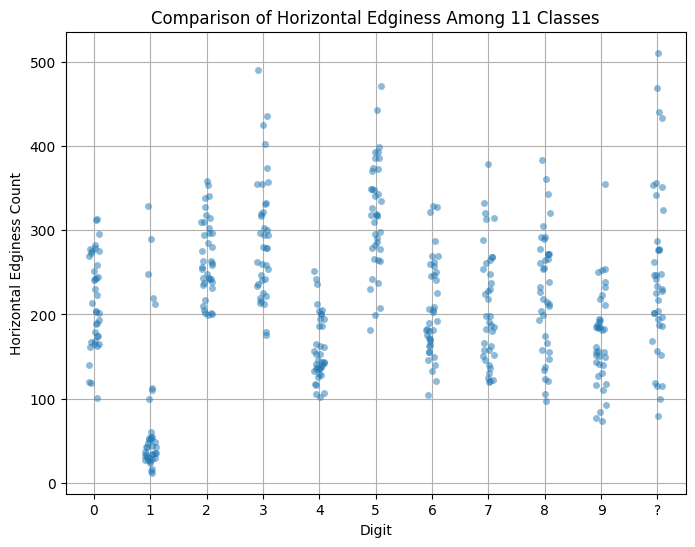

In [ ]:
# create plot

horzdfmelted = horzdf.reset_index().melt(id_vars='Name', var_name='Digit', value_name='Horizontal Edginess Count')
plt.figure(figsize=(8, 6))
sns.stripplot(data=horzdfmelted, x='Digit', y='Horizontal Edginess Count', jitter=True, alpha=0.5)
plt.xlabel('Digit')
plt.ylabel('Horizontal Edginess Count')
plt.title('Comparison of Horizontal Edginess Among 11 Classes')
plt.grid(True)
plt.show()

## part (h) -- outlier identification

In [ ]:
### ANSWER ###

# for this problem, I will define outlier as anything more than 1.5 ⋅ IQR ‍ above
# the third quartile or below the first quartile.

# group the data by 'Digit'
grouped = horzdfmelted.groupby('Digit')

# initialize a list to store outliers
outliers = []

# iterate over each group
for digit, group in grouped:
    # calculate the first and third quartiles (Q1 and Q3)
    Q1 = group['Horizontal Edginess Count'].quantile(0.25)
    Q3 = group['Horizontal Edginess Count'].quantile(0.75)

    # calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # find outliers
    outlier_rows = group[(group['Horizontal Edginess Count'] < lower_bound) | (group['Horizontal Edginess Count'] > upper_bound)]

    # add outliers to the list
    for index, row in outlier_rows.iterrows():
        outliers.append(f"The {row['Digit']} drawn by {row['Name']} is an outlier.")

# print the list of outliers
for outlier in outliers:
    print(outlier)

The 1 drawn by Mei F is an outlier.
The 1 drawn by Joy X is an outlier.
The 1 drawn by Sarah Rose O is an outlier.
The 1 drawn by Camryn N is an outlier.
The 1 drawn by Ozioma O is an outlier.
The 1 drawn by Justin R is an outlier.
The 1 drawn by Kate K is an outlier.
The 1 drawn by Ben d is an outlier.
The 3 drawn by Chris S is an outlier.
The 9 drawn by Fhasal A is an outlier.
The ? drawn by Nicholas D is an outlier.
The ? drawn by Isabel L is an outlier.
The ? drawn by Kate K is an outlier.
The ? drawn by Isaac B is an outlier.


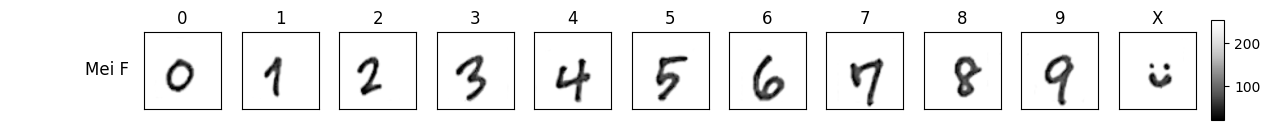

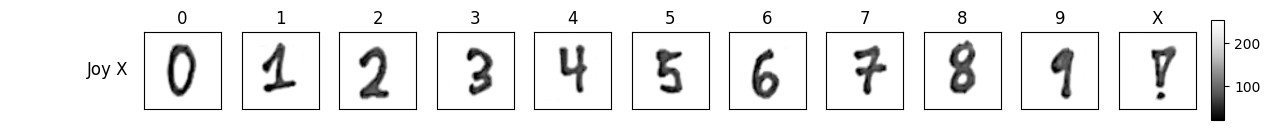

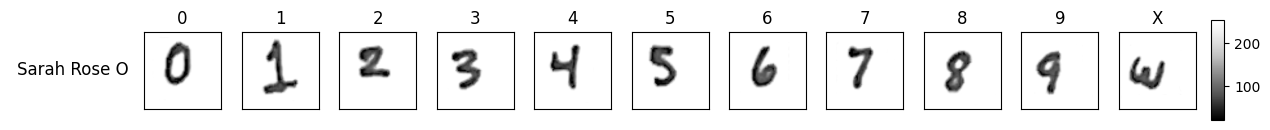

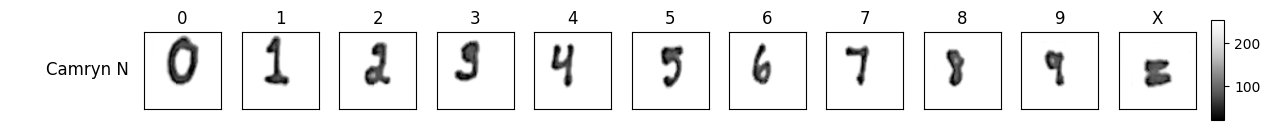

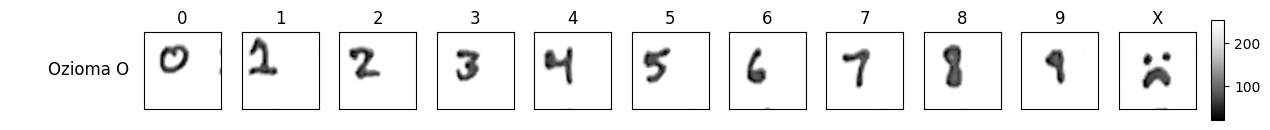

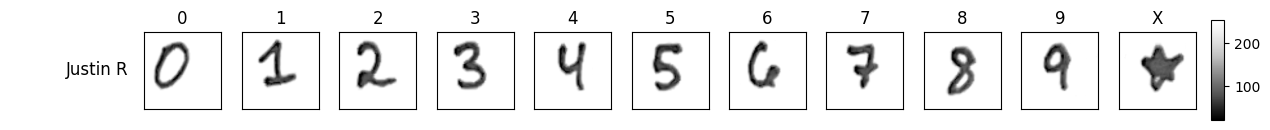

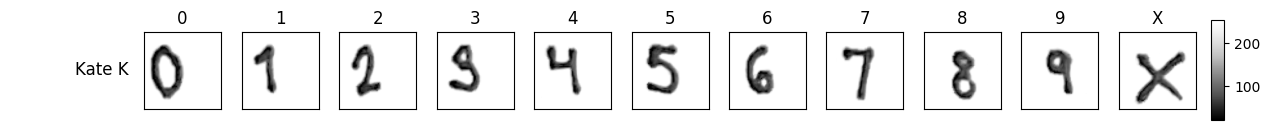

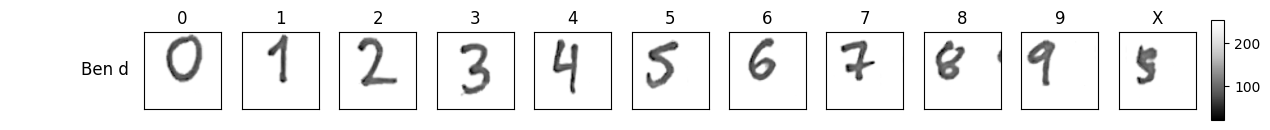

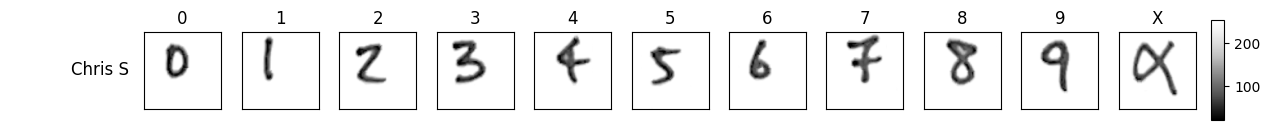

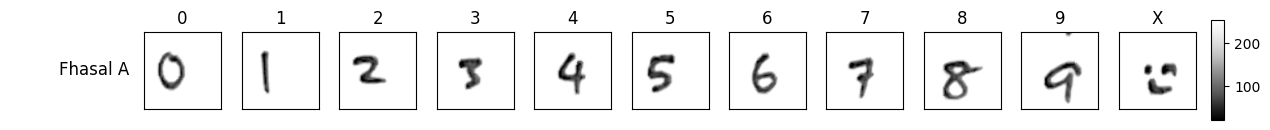

In [ ]:
# let's see why!
badwriters = ["Mei F", "Joy X", "Sarah Rose O", "Camryn N", "Ozioma O", "Justin R", "Kate K",
              "Ben d", "Chris S", "Fhasal A"]
for badwriter in badwriters:
  plot_digits(images[badwriter], label = badwriter)

```
### EXPLANATION ###

The identified outliers make sense. The 1s drawn Mei, Joy, Sarah Rose, Camryn, Ozioma, and Justin are all outliers
because they were written with a short horizontal line at the bottom. This is something that will clearly affect
the horizontal edginess value, which is sensitive to horizontal edges. Additionally, the top part of the 3 written
by Chris is more horizontal than the others, which might have led to a higher horizontal edginess value (and
therefore classification as an outlier).
```





## part (i) -- vertical edge detection

```
### ANSWER ###

vertical edge detection is particularly effective for digits that have distinctive vertical features. most benefit:
digits with vertical strokes, like 0, 1, 4, 5, 6, 7 and 9. least benefit: digits with predominantly horizontal or
diagonal strokes, like 2, 3 and 8 and irregular shapes (like the character "?") that lack distinct vertical features.
```



In [ ]:
vert_kernel = np.array([[ -1, 0, 1 ], [ -2, 0, 2 ], [ -1, 0, 1 ]])

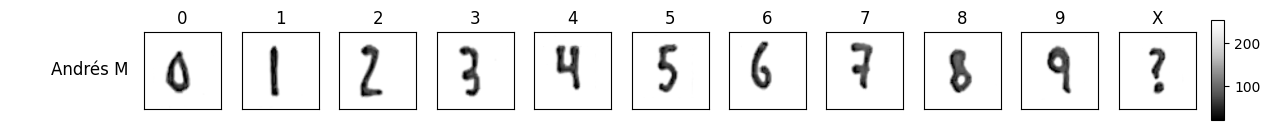

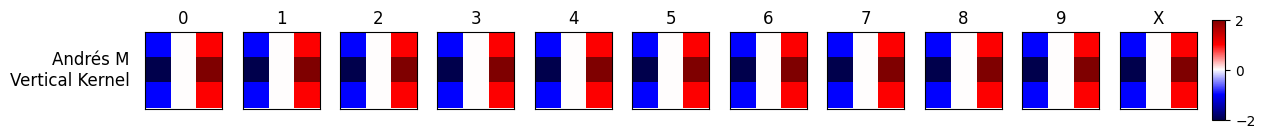

In [ ]:
### ANSWER E.2 ###

conv_vert = [[[ -1, 0, 1 ], [ -2, 0, 2 ], [ -1, 0, 1 ]]] * 11
name = 'Andrés M'
plot_digits(images[name], label=name)
plot_digits(conv_vert, label=name + '\nVertical Kernel')

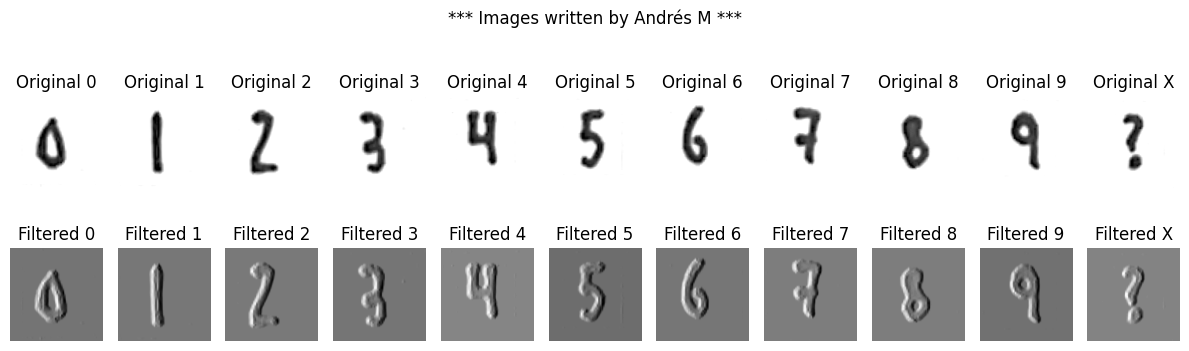

In [ ]:
# apply edge detector to images made by myself
filtered_imagesv = []
for image in images['Andrés M']:
    # apply convolution
    filtered_imagev = convolve2d(image, vert_kernel, mode='same', boundary='symm')
    filtered_imagesv.append(filtered_imagev)

# plot original and filtered images
plt.figure(figsize=(12, 4))
plt.suptitle('*** Images written by Andrés M ***')
for i, (image, filtered_imagev) in enumerate(zip(images['Andrés M'], filtered_imagesv)):
    plt.subplot(2, len(images['Andrés M']), i + 1)
    plt.imshow(image, cmap='gray')
    if i == 10:
      plt.title('Original X')
    else:
      plt.title(f'Original {i}')
    plt.axis('off')

    plt.subplot(2, len(images['Andrés M']), len(images['Andrés M']) + i + 1)
    plt.imshow(filtered_imagev, cmap='gray')
    if i == 10:
      plt.title('Filtered X')
    else:
      plt.title(f'Filtered {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

```
### ANSWER ###

As expected, the detector picked up on the distinctive vertical features of digits 0, 1, 4, 5, 6, 7 and 9. However, it was quite
surprising to see that it also picked up on smaller slightly vertical features along more curvilinear digits such as 2 and 3.
```



[437, 355, 352, 310, 483, 290, 389, 314, 341, 349, 277]


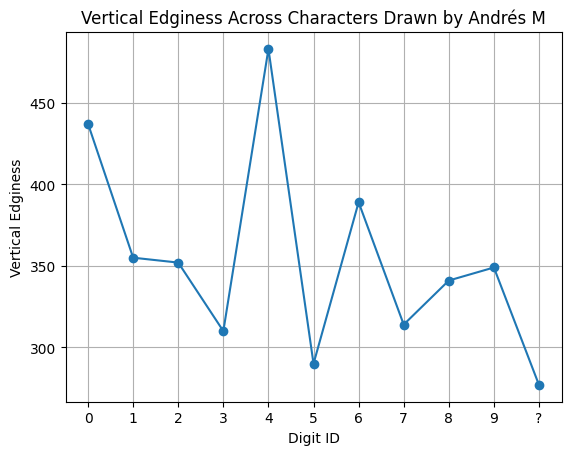

In [ ]:
### ANSWER F.2 ###

vert_cutoff = 200 # FIXME
vertedg = []
for character in filtered_imagesv:
  pixcount = 0
  for row in character:
    for pixval in row:
      if pixval >= vert_cutoff:
        pixcount += 1
  vertedg.append(pixcount)
print(vertedg)
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "?"]
plt.plot(digits, vertedg, marker='o', linestyle='-')
plt.xlabel('Digit ID')
plt.ylabel('Vertical Edginess')
plt.title('Vertical Edginess Across Characters Drawn by Andrés M')
plt.grid(True)
plt.show()

In [ ]:
### ANSWER G.2 ##

# calculate vertical edginess for all digits written by everyone in the class
vertedgall = []
for name, image_list in images.items():
    filtered_images_per_namev = []
    individual_vertedglist = []
    for image in image_list:
        # apply convolution
        filtered_imagev = convolve2d(image, vert_kernel, mode='same', boundary='symm')
        # count horizontal edginess for each digit
        pixcount = 0
        for row in filtered_imagev:
          for pixval in row:
            if pixval >= vert_cutoff:
              pixcount += 1
        individual_vertedglist.append(pixcount)
    vertedgall.append(individual_vertedglist)

# create pandas dataframe with horiziontal edginess per digit for all writers
vertdf = pd.DataFrame(data = vertedgall,
                     index = names,
                     columns = list(digits)).rename_axis(index = "Name", columns = "Digit")
vertdf.head()

Digit,0,1,2,3,4,5,6,7,8,9,?
Name,,,,,,,,,,,
Mei F,357,310,314,366,396,320,467,436,328,406,211
Marvel H,265,183,242,249,251,223,255,297,303,212,454
Joy X,617,392,397,366,439,322,397,320,451,354,346
Andrés M,437,355,352,310,483,290,389,314,341,349,277
David A,669,352,346,309,421,285,339,336,456,303,343


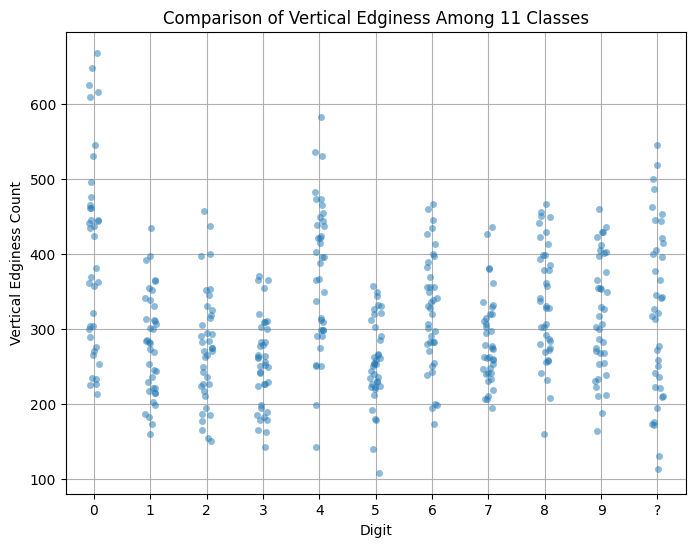

In [ ]:
# create plot
vertdfmelted = vertdf.reset_index().melt(id_vars='Name', var_name='Digit', value_name='Vertical Edginess Count')
plt.figure(figsize=(8, 6))
sns.stripplot(data=vertdfmelted, x='Digit', y='Vertical Edginess Count', jitter=True, alpha=0.5)
plt.xlabel('Digit')
plt.ylabel('Vertical Edginess Count')
plt.title('Comparison of Vertical Edginess Among 11 Classes')
plt.grid(True)
plt.show()

In [ ]:
### ANSWER H.2 ###

# group the data by 'Digit'
grouped = vertdfmelted.groupby('Digit')

# initialize a list to store outliers
outliers = []

# iterate over each group
for digit, group in grouped:
    # calculate the first and third quartiles (Q1 and Q3)
    Q1 = group['Vertical Edginess Count'].quantile(0.25)
    Q3 = group['Vertical Edginess Count'].quantile(0.75)

    # calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # find outliers
    outlier_rows = group[(group['Vertical Edginess Count'] < lower_bound) | (group['Vertical Edginess Count'] > upper_bound)]

    # add outliers to the list
    for index, row in outlier_rows.iterrows():
        outliers.append(f"The {row['Digit']} drawn by {row['Name']} is an outlier.")

# print the list of outliers
for outlier in outliers:
    print(outlier)

The 5 drawn by Luis A is an outlier.
The 7 drawn by Mei F is an outlier.


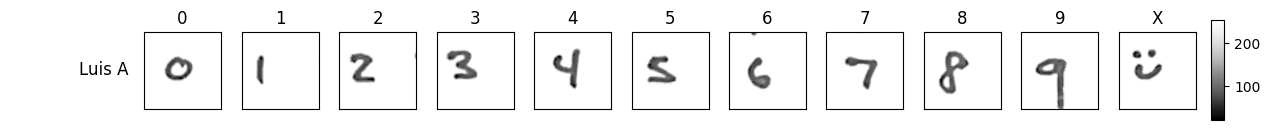

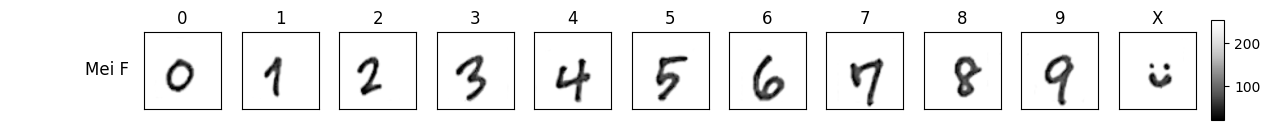

In [ ]:
# let's see why!
badwriters = ["Luis A", "Mei F"]
for badwriter in badwriters:
  plot_digits(images[badwriter], label = badwriter)

The 7 written by Mei is an outlier because it has an additional vertical line. The 5 written by Luis has a weird shape.

```
### ANSWER ###

Based on the distributions observed, it appears that horizontal edginess is a better feature to distinguish digits
(i.e. there is more variation between digits than with horizontal edginess).
```

### part (j)

         Name Digit  Horizontal Edginess Count  Vertical Edginess Count
0       Mei F     0                        282                      357
1    Marvel H     0                        314                      265
2       Joy X     0                        190                      617
3    Andrés M     0                        161                      437
4     David A     0                        120                      669
..        ...   ...                        ...                      ...
413   Isaac B     ?                        440                      365
414    Luis A     ?                        247                      221
415    Emma N     ?                        100                      173
416    Ryan M     ?                        342                      223
417     Ben d     ?                        157                      209

[418 rows x 4 columns]


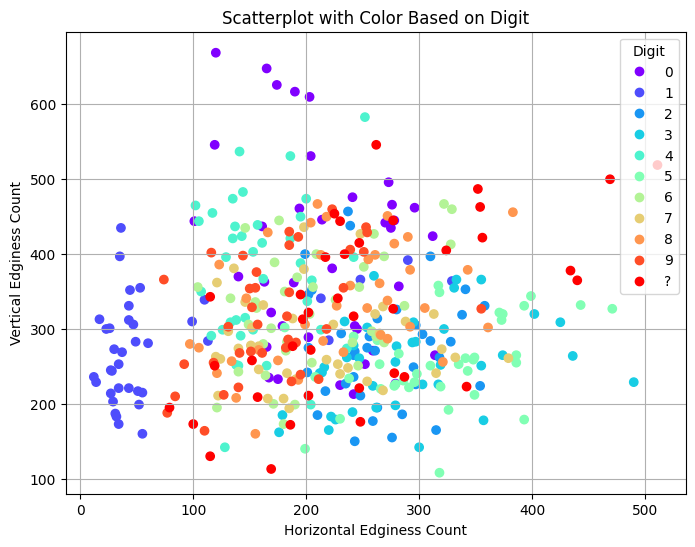

In [ ]:
horzvertmerge = pd.merge(horzdfmelted, vertdfmelted)
print(horzvertmerge)

# define categorical variable for color coding
horzvertmerge['Digit'] = pd.Categorical(horzvertmerge['Digit'])

# scatterplot with color based on IDs in column 'A'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(horzvertmerge['Horizontal Edginess Count'],
                      horzvertmerge['Vertical Edginess Count'],
                      c= horzvertmerge['Digit'].cat.codes, cmap='rainbow')

unique_digits = horzvertmerge['Digit'].unique()
legend_labels = [f'{digit}' for digit in unique_digits]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Digit')

# Add labels and title
plt.xlabel('Horizontal Edginess Count')
plt.ylabel('Vertical Edginess Count')
plt.title('Scatterplot with Color Based on Digit')

# Show plot
plt.grid(True)
plt.show()


```
### ANSWER ###

As shown by graph, there aren't any clear digit-specific clustering patterns (significant overlap is observed). This
means that it is very difficult to distinguish between the digits, even if we account for both features (horizontal and
vertical edginess).

```



## part (k) -- other features

```
### ANSWER ###

Other features we could extract from the images to improve discrimination improve:
- curvature: kernel to identify regions of curvature.
- corners: kernel to identify corners and junctions.
- gradient: kernel to identify changes in image intensity.
```

## part (l) -- input and output

```
### ANSWER ###

Input = Images depicting digits (dimension: 120 x 120)
Output = Text indicating what digit is depicted in each image (dimension: 1)
```

## part (m) -- hyperparameter

```
### ANSWER ###

Hyperparameters in ANN:
- Number of layers.
- Number of nodes per layer.
- Activation function.
```

## part (n) -- weight changes

```
### ANSWER ###

Weights will change over time in order to minimize error. Weights associated with layers corresponding to more
useful features (i.e. features that allow us to easily distinguish between the digits) will increase over time,
and those associated with layers corresponding to less useful features will decrease over time. As time passes,
(and the ANN becomes more accurate), then the rate at which the weights change over time will decrease.
```



## part (o) -- supervised or unsupervised



```
### ANSWER ###

The model learns to distinguish between digits, indicating that it is trained on labeled data where the correct digit labels are known.
```

